In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [18]:
covid = pd.read_csv('Covid Data.csv')
covid.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [20]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [19]:
covid.shape

(1048575, 21)

In [21]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [22]:
covid.dropna(inplace=True)

In [23]:
#Zanienianie daty śmierci na wartość bool
covid = covid.rename(columns={'DATE_DIED':'IF_DIED'})
covid['IF_DIED'] = covid['IF_DIED'].replace('9999-99-99', 1)
covid.loc[covid['IF_DIED'] != 1, 'IF_DIED'] = 0

In [24]:
covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,IF_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,0,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,0,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,0,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,0,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,0,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,1,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,1,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,1,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,1,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [25]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   IF_DIED               1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Text(0.5, 1.0, 'Czy pacjent przeżył')

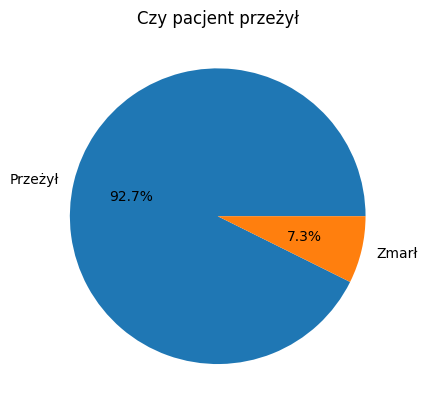

In [26]:
counts = covid['IF_DIED'].value_counts()
labels = ['Przeżył','Zmarł']
plt.pie(counts.values, labels=labels, autopct='%1.1f%%')
plt.title('Czy pacjent przeżył')

<BarContainer object of 7 artists>

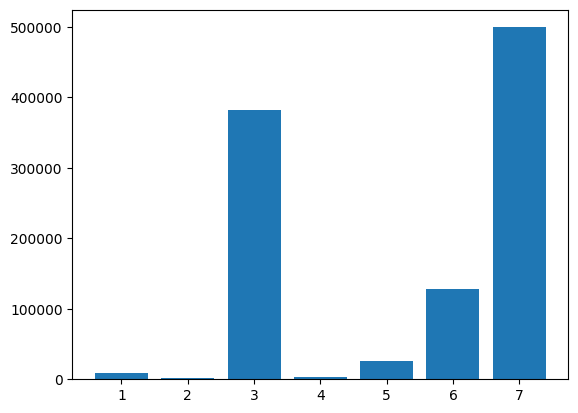

In [27]:
#Podział chorych na klasyfikację
counts = covid['CLASIFFICATION_FINAL'].value_counts()

plt.bar(counts.index, counts.values)

In [28]:
#Usuwanie chorych niezdiagnozowanych na covid
#Osoby z wartościami od 4 do 7 nie zostały zdiagnozowane na covid
#Wartości 1 do 3 to stopień zachorowania, gdzie 1 to najcięższe objawy a 3 najlżejsze.
covid = covid[~covid['CLASIFFICATION_FINAL'].isin([4, 5, 6, 7])]
covid.reset_index(drop=True, inplace=True)
covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,IF_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,0,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,2,0,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
2,2,1,2,1,0,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
3,2,1,1,2,1,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
4,2,1,1,1,1,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391974,1,13,1,2,1,2,2,77,2,1,...,2,1,1,2,2,2,2,2,3,2
391975,1,13,1,1,1,97,2,55,2,1,...,2,2,2,2,2,2,2,2,3,97
391976,1,13,2,1,1,97,2,70,97,2,...,2,2,1,2,2,2,2,2,3,97
391977,2,13,2,1,1,97,2,32,97,2,...,2,2,2,2,2,2,2,2,3,97


Text(0.5, 1.0, 'Ciąża')

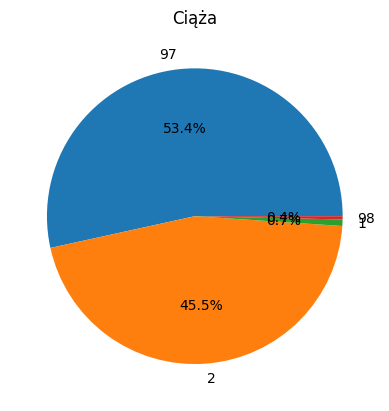

In [29]:
#Usuwanie kolumny pregnant
counts = covid['PREGNANT'].value_counts()
labels = counts.index.tolist()
plt.pie(counts.values, labels=labels, autopct='%1.1f%%')
plt.title('Ciąża')



In [30]:
#Wartości 97 i 98 to wartości błędne, 1 i 2 to odpowiednio ciąża lub jej brak
#Jak pokazuje powyższy wykres większosć danych jest zanieczyszczona więc usuwamy kolumnę Pregnant

covid = covid.drop('PREGNANT', axis=1)

In [31]:
#Usuwanie kolumn INTUBED i ICU
#Intubed i ICU to skutki zachorowania a nasz model będzie badał co wpłynęło
#na intensywność zachorowania

#Medical_unit i USMER to rodzaj placówki medycznej do której pacjent został przyjęty,
#więc także nie wpływa na to na wynik

#Patient_type określa czy pacjent został przyjęty do szpitala.

columns_to_drop = ['INTUBED', 'ICU','USMER','MEDICAL_UNIT','PATIENT_TYPE']
covid = covid.drop(columns_to_drop, axis=1)




In [33]:
covid

,SEX,PATIENT_TYPE,IF_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,1,0,1,65,2,2,2,2,1,2,2,2,2,2,3
1,2,2,0,2,55,1,2,2,2,2,2,2,2,2,2,3
2,2,1,0,2,68,1,2,2,2,1,2,2,2,2,2,3
3,1,2,1,1,40,2,2,2,2,2,2,2,2,2,2,3
4,1,1,1,2,64,2,2,2,2,2,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391974,1,2,1,2,77,1,2,2,1,1,2,2,2,2,2,3
391975,1,1,1,2,55,1,2,2,2,2,2,2,2,2,2,3
391976,2,1,1,2,70,2,2,2,2,1,2,2,2,2,2,3
391977,2,1,1,2,32,2,2,2,2,2,2,2,2,2,2,3


In [34]:
#Definiowanie X i y
X = covid.drop('CLASIFFICATION_FINAL', axis=1)
y = covid.CLASIFFICATION_FINAL


In [35]:
#Dzielenie zioru
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size =0.2, random_state=420)


In [36]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
y_pred = clf.predict(X_test)

In [41]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))


In [44]:
perform(y_pred)

Precision :  0.9733149650492372
Recall :  0.9733149650492372
Accuracy :  0.9733149650492372
F1 Score :  0.9733149650492372

 [[    0     0  1700]
 [    0     0   392]
 [    0     0 76304]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1700
           2       0.00      0.00      0.00       392
           3       0.97      1.00      0.99     76304

    accuracy                           0.97     78396
   macro avg       0.32      0.33      0.33     78396
weighted avg       0.95      0.97      0.96     78396

******************************************************



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
